# Notebook 1 - Fuzzy Logic

Based on the book [Artificial Intellgence: Foundations of Computational Agents](http://artint.info/2e/html/ArtInt2e.html)

***INTRODUCTION***:   
We will look at an example of applying fuzzy logic to a problem programmatically. Throughout the notebook, linguistic variables will be defined that represent the components of the problem. These variables will be used alongside specific rules to solve a problem. This is done through the use of fuzzification, the application of inference rules, and the defuzzification of the result.   
   
The fuzzy logic system that we are building will help someone decide on which activity to do and for how long. This will depend on how close he/she is to the weekend and on how busy he/she is. The three possible activit are: Yoga, Playing games, and Skiing. The fuzzy rules that we will define in our fuzzy logic system will apply on two possible antecedents (two linguistic variables) Day and Busy. An overview is shown below in *Image 1*.    

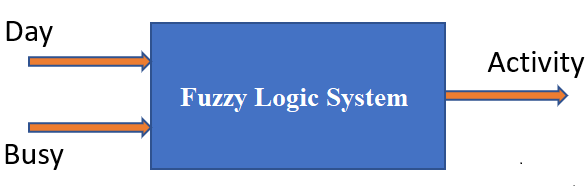
   
By performing all core components of a fuzzy logic system to solve a problem statement, you will improve your understanding of how fuzzy logic can be applied to real-world problems and how each component of a fuzzy logic system works.    

An important note to keep in mind when staring the notebook is that there are classes with a decent amount of code, but you will only need to **use the functions from the LinguisticVariable class** when performing a step that uses a variable from that class. Thus, do not be intimidated if it seems like a lot of code since you will just need to call the appropriate functions when they are needed.    

One library that will be used is matplotlib which is an excellent graphing library. The library allows you to create many different types of plots from your data and customize the graphs accordingly. To install matplotlib, run the following command in your console: *pip install matplotlib*

***HOMEWORK***:  
Go through the notebook by running each cell, one at a time. If you see an error, you can fix the issue and re-run the cells.  
Look for **(TO DO)** for the tasks that you need to perform.  Once you're done, submit your notebook. 

*The notebook will be marked on 30.  
Each **(TO DO)** has a number of points associated with it.*
***

In [1]:
# Imports
# Call pip install matplotlib in the console to install this library
import matplotlib.pyplot as plt

**1. Definition of a linguistic variable.**  
A linguistic variable is represented by its name, its possible values, and its fuzzy subsets. This can be represented by a triplet (V, X, T). The classes below define each component of a linguistic variable. The LinguisticVariable class' constructor accepts its name (V from the triplet) and the names of the values associated with the variable in the form of a list (X from the triplet). The fuzzy subsets (T in the triplet) are added after the linguistic variable is defined.     

An important note about this class is that the possible values that are passed to the LinguisticVariable object can be of two types:
1. [name1, name2, name3, ..., nameN], where each name is a discrete value associated with the variable and are all strings
2. [(num1, num2)], where num1 and num2 are integers that represent a continuous range of real numbers in the form of a tuple     

These possible values are stored in the possible_values list of the LinguisticVariable class and are later passed to the value_names list in the Values class.    

Another note is that the Values class stores a list of mathematical equations under its .functions variable. This is a list of lambda expressions that execute mathematical functions. This list of functions must be the same length as the list of value_names. This allows the value_names list and functions list to contain the related information at the same index.

Ex: value_names[0] --> Tuesday
    functions[0] --> lambda x: 0.0
    Therefore when we want to find the fuzzy value for Tuesday at some value x, we call functions[0]\(x) to get that value          
    
The FuzzySubset class contains many of the core functionalitites that will be used in this notebook. However, you will only need to call functions from the LinguisticVariable class to avoid the manipulation of child elements.

In [2]:
# DO NOT MAKE ANY CHANGES TO THIS CLASS
# You will be asked to call the methods of this class, but NOT to change it

class LinguisticVariable():
    '''
    Represents a linguistic variable that contains a name, a set of values for this variable,
    and fuzzy subsets for the values that are used to characterise this variable.
    '''
    def __init__(self, variable_name, values):
        # The name of a variable
        self.variable_name = variable_name
        # A list of all value names
        self.possible_values = values
        # The fuzzy suvbsets that characterize variable_name
        self.fuzzy_subsets = []
        
    def add_fuzzy_subset(self, name, functions):
        '''
        Defines a fuzzy_subset of the specified name and defines functions
        for each value pass into the constructor.
        The functions are expected to be in the same order as the values that they are for.
        Ex: [val1, val2, ...], [function_for_val1, function_for_val2, ...]
        '''
        self.fuzzy_subsets.append(FuzzySubset(name, self.possible_values, functions))
        
    def fuzzification(self, fs_name, x):
        '''
        Finds the fuzzy subset with the specified name (fs_name) and fuzzifies the value x
        '''
        fs_index = [fs.name.lower() for fs in self.fuzzy_subsets].index(fs_name.lower()) 
        return self.fuzzy_subsets[fs_index].fuzzification(x)
    
    def defuzzification_average_maximas(self, fs_name):
        '''
        By going through each value (increments of 0.5 for continuous variables), returns the average
        x-location for the defuzzification of the transfered membership max_membership
        '''
        fs_index = [fs.name.lower() for fs in self.fuzzy_subsets].index(fs_name.lower())
        return self.fuzzy_subsets[fs_index].defuzzification_average_maximas()
    
    def get_fuzzy_maximum(self, fs_name):
        '''
        Finds the fuzzy subset with the specified name (fs_name) and returns its maximum
        membership degree.
        '''
        fs_index = [fs.name.lower() for fs in self.fuzzy_subsets].index(fs_name.lower()) 
        # Return its maximum membership
        return self.fuzzy_subsets[fs_index].max_membership
    
    def set_fuzzy_maximum(self, fs_name, x):
        '''
        Finds the fuzzy subset with the specified name (fs_name) and assigns x to be its maximum
        membership degree (transfers the membership to this fuzzy subset).
        '''
        fs_index = [fs.name.lower() for fs in self.fuzzy_subsets].index(fs_name.lower()) 
        # Since max_membership is already set to the maximum available y value, only update if
        # x is < the current value.
        if (x < self.fuzzy_subsets[fs_index].max_membership):
            self.fuzzy_subsets[fs_index].max_membership = x
        
    def reset_fuzzy_maximums(self):
        '''
        When a problem is complete, this will reset the maximum_membership values
        for all fuzzy variables back to the maxima in its function
        '''
        for fs in self.fuzzy_subsets:
            if (fs.values.isRangedVariable):
                fs.max_membership = self.reset_fuzzy_maximum_ranged(fs)
            else:
                fs.max_membership = self.reset_fuzzy_maximum_discrete(fs)
            
    def reset_fuzzy_maximum_discrete(self, fs):
        '''
        Returns the maxima for a fs that describes discrete variable
        '''
        vals = [] # The values for each value
        # Go through the values associated with the fuzzy subset
        for value in fs.values.value_names:
            vals.append(fs.fuzzification(value))
        # Set the variable's fuzzy subset maximum to be the maximum value in the plot
        return max(vals)
        
    def reset_fuzzy_maximum_ranged(self, fs):
        '''
        Returns the maxima for a fs that describes a range of real numbers
        '''
        for fs in self.fuzzy_subsets:
            vals = []
            # Determine the number of points to compute
            start = fs.values.value_names[0][0]
            stop = fs.values.value_names[0][1] + 1
            # Compute the points and store them
            # Increment by 0.05 to capture most changes
            for i in range(start, stop):
                # Can use libraries to make this easier, that is somthing we will explore in future notebooks
                for j in range(0, 20):
                    x = i + j * 0.05
                    vals.append(fs.fuzzification(x))
            # Set the variable's fuzzy subset maximum to be the maximum value in the plot
            return max(vals)
        
    def plot(self):
        '''
        Plots a linguistic variable and automatically detects the type of values that
        it contains
        '''
        if (self.fuzzy_subsets[0].values.isRangedVariable):
            self.plot_ranged_variable()
        else:
            self.plot_discrete_variable()
    
    def plot_discrete_variable(self):
        '''
        Plots the linguistic variable if the values are discrete
        '''
        fig = plt.figure()
        axes = fig.add_axes([0, 0, 1, 1])
        x_vals = [] # The lavels on the x-axis
        plot_values = [] # The values for each value
        y_label = "Variable " + self.variable_name
        # Go through the fuzzy subsets (only one in this notebook)
        fs = self.fuzzy_subsets[0]
        # Go through the values associated with the fuzzy subset
        for value in fs.values.value_names:
            x_vals.append(value)
            plot_values.append(fs.fuzzification(value))
        # Set the variable's fuzzy subset maximum to be the maximum value in the plot
        self.fuzzy_subsets[0].max_membership = max(plot_values)
        # Add the values to the plot
        axes.bar(x_vals, plot_values)
        # Show the plot
        plt.show()
    
    def plot_ranged_variable(self):
        '''
        Plots the linguistic variable if the values are a range
        '''
        x_label = "Number of hours" # Fixed in this notebook, otherwise would add to the tuple
        y_label = "Variable " + self.variable_name
        for fs in self.fuzzy_subsets:
            x_points = []
            y_points = []
            # Determine the number of points to compute
            start = fs.values.value_names[0][0]
            stop = fs.values.value_names[0][1] + 1
            # Compute the points and store them
            # Increment by 0.05 to capture most changes
            for i in range(start, stop):
                # Can use libraries to make this easier, that is somthing we will explore in future notebooks
                for j in range(0, 20):
                    x = i + j * 0.05
                    x_points.append(x)
                    y_points.append(fs.fuzzification(x))
            # Set the variable's fuzzy subset maximum to be the maximum value in the plot
            fs.max_membership = max(y_points)
            # Add the points to the plot
            plt.plot(x_points, y_points, label=fs.name)
        # Add the labels
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        # Define the limits of the plot
        axes = plt.gca()
        axes.set_xlim([self.fuzzy_subsets[0].values.value_names[0][0], self.fuzzy_subsets[0].values.value_names[0][1]])
        axes.set_ylim(0, 1.1)
        # Add a grid to the plot
        plt.grid()
        # Add a legend to the plot
        plt.legend()
        # Show the plot
        plt.show()

In [3]:
# DO NOT MAKE ANY CHANGES TO THIS CLASS
# This class is used by the LinguisticVariable class.  You will NOT make any calls to this class.

class Values():
    '''
    Stores the names of the values and a list of functions that describe the value for a fuzzy subset.
    values: A list of the names of the values. If a numerical range, the list will only contain
            a tuple of the form [(num1, num2)] to represent the range between num1 and num2.
            Otherwise it will be of the form [name1, name2, ..., nameN].
            Assumes that discrete items are strings (so if a number, store as a string)
    '''
    def __init__(self, value_names, functions):
        # True if the first element is a tuple of two integers (num1, num2)
        self.isRangedVariable = False
        if type(value_names[0]) is tuple:
            self.isRangedVariable = True
        # The names or range of the values
        self.value_names = value_names
        # The functions used to compute values for each value (if range, an equation)
        # The index is the same as the value index
        self.functions = functions

In [4]:
# DO NOT MAKE ANY CHANGES TO THIS CLASS
# This class is used by the LinguisticVariable class.  You will NOT make any calls to this class.

class FuzzySubset():
    '''
    Represents a single fuzzy subset.
    Accepts a name, list of values, and list of lambda equations as input.
    The values are stored as a Values object which also contain the functions that the
    fuzzy subset maps to each value.
    The max_membership parameter represents the maximum membership value that can be given
    at a given point in time.
    '''
    def __init__(self, name, values, functions):
        self.name = name
        self.values = Values(values, functions)
        self.max_membership = 1
        
    def fuzzification(self, x):
        '''
        Returns the membership value for the value x
        x: The value to be used
        '''
        membership = -1
        if self.values.isRangedVariable:
            # If a range, then x is the value within the range
            membership = self.values.functions[0](x)
        else:
            # If not a range, then x represents the index for the appropriate value
            value_index = [val.lower() for val in self.values.value_names].index(x.lower()) 
            membership = self.values.functions[value_index](0)
        return membership
    
    def defuzzification_average_maximas(self):
        '''
        Using the max_membership value, finds all values >= that value since they are the
        maximas after the transferring of membership degree.
        Loops through all key points in the plot (since it can be a continuous value) and
        averages the x values that are >= max_membership
        '''
        x_points = []
        # Determine the number of points to compute
        start = self.values.value_names[0][0]
        stop = self.values.value_names[0][1] + 1
        # Compute the points and store all maxima x-values
        # Increment by 0.05 to capture most changes
        for i in range(start, stop):
            # Can use libraries to make this easier, that is somthing we will explore in future notebooks
            for j in range(0, 20):
                x = i + j * 0.05
                # Store only if the y-value is a maxima
                if self.fuzzification(x) >= self.max_membership:
                    x_points.append(x)
        # Return the average of all x-values
        return sum(x_points) / len(x_points)

**2. Creating LinguisticVariable objects.**  
With the class definitions above, we are now able to define the various linguistic variables that will be used in this notebook. The following variables will be defined:   
1. *Day*: The values are the days of the week and there is only one fuzzy_subset named *Weekend*. This is an antecedent.
2. *Busy*: The values are all real numbers in the range [0, 10], representing the number of hours and there are three fuzzy subsets {Little, Moderate, Very}. This is an antecedent.
3. *Activity*: The values are all real numbers in the range [0, 10], representing the number of hours and there are currently two fuzzy subsets {Ski, Yoga} (you will define a third later). This is a consequent.

The first linguistic variable to define is for the Day variable. Below includes all steps for defining the variable (defining the values, the fuzzy variable(s), and defining the function(s) to map a fuzzy variable to every value).

In [5]:
# Start by defining the values (each dayy of the week)
day_values = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
# Define the Day linguistic variable
day_lv = LinguisticVariable("Day", day_values)
# Begin defining the functions for the Weekend fuzzy subset (a function for each value)
day_functions = []
# For Sunday
day_functions.append(lambda x: 0.95)
# For Monday
day_functions.append(lambda x: 0.0)
# For Tuesday
day_functions.append(lambda x: 0.0)
# For Wednesday
day_functions.append(lambda x: 0.0)
# For Thursday
day_functions.append(lambda x: 0.3)
# TODO: See (TODO) Q1 below
# For Friday
day_functions.append(lambda x: 0.7) # changed from 0.5 to 0.7
# For Saturday
day_functions.append(lambda x: 1.0)
# Setup the Weekend fuzzy element in the linguistic variable
day_lv.add_fuzzy_subset("Weekend", day_functions)

# Show the value for Thursday
chosenDay = "Thursday"
# For the first fuzzy subset (weekend), what is the membership of Thursday?
chosenDayMembership = day_lv.fuzzy_subsets[0].fuzzification("Thursday")
print("The Weekend membership for the value " + chosenDay + " is " + str(chosenDayMembership))

The Weekend membership for the value Thursday is 0.3


With the linguistic variable *day_lv* defined, we will plot it to view the graph

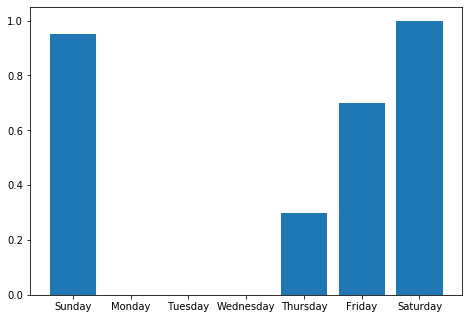

In [6]:
# Plot the linguistic variable
day_lv.plot()

**(TO DO) Q1 - 1 mark**  
In day_lv you see that Friday is set to 0.5 membership to the week-end.  That is too low, since Friday is almost the week-end.  Change the code above (and rerun the cell) to have Friday be at 0.7 membership of week-end.

**(TO DO) Q2 - 3 marks**  
With day_lv defined, we must now define busy_lv for the *Busy* linguistic variable. Following the code templates below, complete the definition of busy_lv.   

Recall from the description defined at the beginning of section 2 that this variable use continous variable within a range. These value names are defined by a single tuple of integers [(num1, num2)] rather than a list of strings.

The following figure (*Image 2*) exhibits how the plot for the Busy linguistic variable must look when you run the following cell. You will need to complete the definition of busy_lv by finding the correct function to pass for the *Very* fuzzy subset. Examples of how these mathematical equations are defined and added are shown below (the lambda expressions).

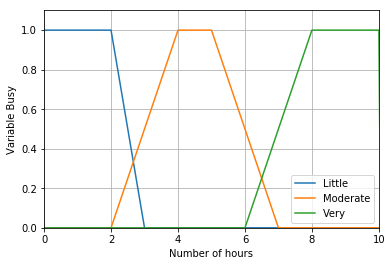

(0, 10)


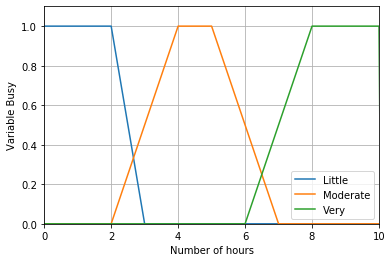

In [7]:
# Define the Busy linguistic variable
busy_values = [(0, 10)]
# TODO: Define the linguistic variable busy_lv
busy_lv = LinguisticVariable("Busy", busy_values) # change
busy_functions = []

# Define functions for the Little fuzzy set
# For (0, 10)
busy_functions = [lambda x: -x+3 if 2<=x<=3 else (1 if 0<=x<=2 else 0)]
# Setup the Little fuzzy element
busy_lv.add_fuzzy_subset("Little", busy_functions)

# Define functions for the Moderate fuzzy set
# For (0, 10)
busy_functions = [lambda x: (x-2)/2 if 2<=x<=4 else ((-x+7)/2 if 5<=x<=7 else (1 if 4<=x<=5 else 0))]
# Setup the Moderate fuzzy element
busy_lv.add_fuzzy_subset("Moderate", busy_functions)

# TODO: Setup the Very busy function and add that fuzzy set
# Define functions for the Very fuzzy set
# For (0, 10)
busy_functions = [lambda x: (x-6)/2 if 6<=x<=8 else (1 if 8<=x<=10 else 0)] # change
# Setup the Very fuzzy element
busy_lv.add_fuzzy_subset("Very", busy_functions) # change

# Show an example output
print(busy_lv.fuzzy_subsets[0].values.value_names[0])
busy_lv.fuzzy_subsets[0].values.functions[0](0.1234345)

# Plot the graph
busy_lv.plot()

**(TO DO) Q3 - 4 marks**  
Now that we have defined the *Day* and *Busy* linguistic variables, you will define the *Activity* linguistic variable. defined by activity_lv. This variable contains three fuzzy subsets: Yoga, Ski, and Play games. The values for this variable are all real numbers in the range [0, 10].   

Below is a plot (*Image 3*) of what the variable must look like after the cell is run below. You must define the functions for the *Ski* fuzzy subset and the *Play games* fuzzy subset to match the the plot below.

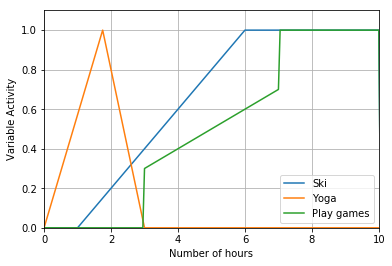

(0, 10)


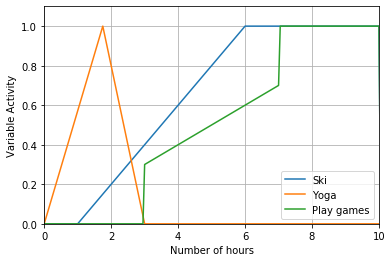

In [8]:
# TODO: Instantiate the Activity linguistic variable
# Define the Activity linguistic variable
activity_values = [(0,10)] # change
activity_lv = LinguisticVariable("Activity", activity_values) # change
activity_functions = []

# TODO: Define the function and add the fuzzy set
# Define functions for the Ski fuzzy set
# For (0, 10)
activity_functions = [lambda x: 1 if 6<=x<=10 else ((x-1)/5 if 1<=x<=6 else 0)] # change
# Setup the ski fuzzy element
activity_lv.add_fuzzy_subset("Ski", activity_functions) # change

# Define functions for the Yoga fuzzy set
# For (0, 10)
activity_functions = [lambda x: x/1.75 if 0<=x<=1.75 else ((-x+3)/1.25 if 1.75<=x<=3 else 0)]
# Setup the yoga fuzzy element
activity_lv.add_fuzzy_subset("Yoga", activity_functions)

# TODO: Define the function and add the fuzzy set
# Define functions for the Play games fuzzy set
# For (0, 10)
activity_functions = [lambda x: (x)/10 if 3<=x<=7 else (1 if 7<=x<=10 else 0)] # change
# Setup the Play games fuzzy element
activity_lv.add_fuzzy_subset("Play games", activity_functions) # change

# Show an example output
print(activity_lv.fuzzy_subsets[0].values.value_names[0])
activity_lv.fuzzy_subsets[1].values.functions[0](2)

# Plot the graph
activity_lv.plot()

 We will now plot all of the graphs again to view the linguistic variables.

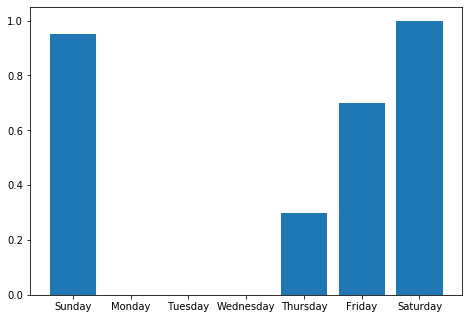

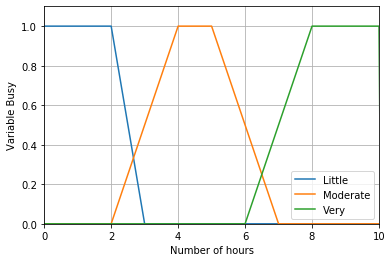

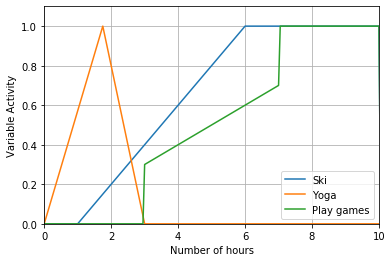

In [9]:
# Plot everything with matplot
day_lv.plot()
busy_lv.plot()
activity_lv.plot()

**3. Defining fuzzy if-then rules.**  
Now that the linguistic variables have been defined, fuzzy if-then rules (which will just be referred to as rules) can be defined to use when reasoning. These rules can be defined with the fuzzy logic *NOT*, fuzzy logic *AND*, and fuzzy logic *OR* operators. The rules that are defined in this section will be used later along with the *NOT*, *AND*, and *OR* functions that will be completed in this section.    

Below are the first two rules that will be considered through the remainder of the notebook.     
***
*Rule 1* - If it is the *Weekend* and I am *Very Busy*, I will go to *Yoga*.     
*Rule 2* - If it is the *Weekend* and I am a *Little Busy* or *Moderately Busy*, I will go to *Ski*.    
***

**(TO DO) Q4 - 1 mark**  

In this cell, define Rule 3 in English to be a rule of your choice with *exactly one fuzzy logic OR*, with *Exactly one fuzzy logic NOT*, and where the consequent is the *Play games* Activity.   
***        
*Rule 3* - If it is the *Weekend* and I am not *Very Busy* or not *Moderately Busy*, I will go to *Play games*
***

Next, the fuzzy logic operators must all be implemented. The following *fuzzy_NOT* function is provided as a complete example.

In [10]:
def fuzzy_NOT(num):
    '''
    Provides the returned result for the fuzzy logic NOT operator.
    num1: The first membership value
    num2: The second membership value
    returns the numerical fuzzy_NOT operator's result when applied on num1 and num2 rounded to
        the second decimal place (due to floating point imprecisions)
    '''
    return round(1 - num, 2) 

**(TO DO) Q5 - 2 marks**  
In the two cells below, complete the definitions for the fuzzy_OR and fuzzy_AND functions. For more details on these functions, refer to your lecture notes.

In [11]:
# TODO: Complete the function
def fuzzy_OR(a, b):
    '''
    Provides the returned result for the fuzzy logic OR operator.
    '''
    return max (a, b)

In [12]:
# TODO: Complete the function
def fuzzy_AND(a, b):
    '''
    Provides the returned result for the fuzzy logic AND operator.
    '''
    return min (a, b)

**4. Fuzzification.**  
The first step to solving a problem is to perform *fuzzification*. This process has already been programmed for you in the LinguisticVariable class. This *.fuzzification(fs_name, x)* function requires the name of the fuzzy subset and the value which you are want to get the membership fuzzy subset's membership of as input.

Let us take a look at the following fuzzification example. This will fuzzify the following statement:   
*It is Thursday and this first module will take me 2.5 hours to do.*

In [13]:
print("It is Thursday and this first module will take me 2.5 hours to do.")
# The first value is Thursday, so we will get the membership of weekend for the value Thursday
weekend_membership_test = day_lv.fuzzification("Weekend", "Thursday")
print("Thursday has the membership " + str(weekend_membership_test) + " for being the Weekend.")
# The second value is that the work will be 2.5 hours, so how Little, Moderate, and Very busy is that?
little_membership_test = busy_lv.fuzzification("Little", 2.5)
print("2.5 hours has the membership " + str(little_membership_test) + " for being Little busy")
moderate_membership_test = busy_lv.fuzzification("Moderate", 2.5)
print("2.5 hours has the membership " + str(moderate_membership_test) + " for being Moderate busy")
very_membership_test = busy_lv.fuzzification("Very", 2.5)
print("2.5 hours has the membership " + str(very_membership_test) + " for being Very busy")

It is Thursday and this first module will take me 2.5 hours to do.
Thursday has the membership 0.3 for being the Weekend.
2.5 hours has the membership 0.5 for being Little busy
2.5 hours has the membership 0.25 for being Moderate busy
2.5 hours has the membership 0 for being Very busy


ATTENTION ---  The problem that we will want to solve starting now is:     
***
    Problem Statement: It is Friday and I still have 4 hours of work to do. What activity will I do and for how long?
***   
This problem statement will be used for the next few sections, so ensure to refer to it when needed. 

**(TO DO) Q6 - 2 marks**  
Perform fuzzification for the problem statement (defined above) in the cell below.

In [14]:
# TODO: Add in the fuzzification calls for the appropriate linguistic variables.
print("It is Friday and I still have 4 hours of work to do. What activity will I do and for how long?")
# Weekend fuzzification
weekend_membership = day_lv.fuzzification("Weekend", "Friday")
print(weekend_membership)
# Little fuzzification
little_membership = busy_lv.fuzzification("Little", 4)
print(little_membership)
# Moderate fuzzification
moderate_membership = busy_lv.fuzzification("Moderate", 4)
print(moderate_membership)
# Very fuzzification
very_membership = busy_lv.fuzzification("Very", 4)
print(very_membership)

It is Friday and I still have 4 hours of work to do. What activity will I do and for how long?
0.7
0
1.0
0


**5. Applying inference rules.**  
Now that fuzzification of the problem statement is complete, we can now begin applying the fuzzy logic operators that have been programmed above on the antecedent of the rules that we have defined in part 3 of this notebook.     

Below is an example of applying the operators on the antecendent of Rule 1 with the test fuzzification data from the previous step.  

When applying the inference rules, we state that they have the following priority (order in which to apply the operators):   
1. fuzzy_NOT: All instances of NOT should be applied first
2. fuzzy_OR: All instances of OR should be applied next
3. fuzzy_AND: All instances of AND should be applied last

In [15]:
print("Rule 1 - If it is the Weekend and I am Very Busy, I will go to Yoga.")
# If it is the Weekend AND I am Very busy -> What is the membership of going to yoga
rule1_membership_test = fuzzy_AND(weekend_membership_test, very_membership_test)
print("The membership value for Yoga is " + str(rule1_membership_test))

Rule 1 - If it is the Weekend and I am Very Busy, I will go to Yoga.
The membership value for Yoga is 0


**(TO DO) Q7 - 2 marks**  
For each of the three rules defined in part 3 of this notebook, the two provided to you and the one that you wrote, correctly apply the operators on the antecedent of the rules. This should be done in the cell below, with the results formatted as seen in the example above. Rule 1 has been shown in the previous cell and has already been filled out for you below.

In [16]:
# RULE 1
print("Rule 1 - If it is the Weekend and I am Very Busy, I will go to Yoga.")
rule1_membership = fuzzy_AND(weekend_membership, very_membership)
print("The membership value for Yoga is " + str(rule1_membership))

#TODO
# RULE 2
print("Rule 2 - If it is the Weekend and I am a Little Busy or Moderately Busy, I will go to Ski.")
rule2_membership = fuzzy_AND(weekend_membership, fuzzy_OR(little_membership, moderate_membership))
print("The membership value for Ski is " + str(rule2_membership))

#TODO
# RULE 3
print("Rule 3 - If it is the Weekend and I am not Very Busy or not Moderately Busy, I will go to Play games")
rule3_membership = fuzzy_AND(weekend_membership, fuzzy_OR(fuzzy_NOT(very_membership), fuzzy_NOT(moderate_membership)))
print("The membership value for Play games is " + str(rule3_membership))

Rule 1 - If it is the Weekend and I am Very Busy, I will go to Yoga.
The membership value for Yoga is 0
Rule 2 - If it is the Weekend and I am a Little Busy or Moderately Busy, I will go to Ski.
The membership value for Ski is 0.7
Rule 3 - If it is the Weekend and I am not Very Busy or not Moderately Busy, I will go to Play games
The membership value for Play games is 0.7


**(TO DO) Q8 - 2 marks**  
With the above membership values, we must transfer the membership degree of the antecedent onto the consequence of each rule. This is done by calling the LinguisticVariable.set_fuzzy_maximum(fs_name, x) function. This function transfers the membership degree x to a fuzzy subset with the name fs_name (in this case, the consequence).   

Your task is to transfer the memberships obtained above onto the corresponding Activity fuzzy subsets.

In [17]:
# TODO: Transfer the membership degrees to the activity_lv fuzzy subsets 
# RULE 1 Transfer
activity_lv.set_fuzzy_maximum('Yoga', rule1_membership)
# RULE 2 Transfer
activity_lv.set_fuzzy_maximum('Ski', rule2_membership)
# RULE 3 Transfer
activity_lv.set_fuzzy_maximum('Play games', rule3_membership)

**6. Defuzzification.**  

The final step to solve the problem statement is to perform defuzzification. This process involves taking a fuzzy input and outputting a crisp output based on one of several potential methods. For this notebook, we will use the average of the x-axis values for which the maximal values found on the y-axis appear. Although more robust methods for performing this exist, we will simply retrieve the locations of the maximal values by retrieving many of the key points of the plot and averaging the x values that produce the maximum y value.   
  
In the previous section, you have transfered the memberships that you obtained to be the maximum membership degree of the consequence. Thus, the maximal value y value appears at every point greater than or equal to the transferred membership (if there are any), or the overall maximum value otherwise.   

The defuzzification must be applied *only* to the fuzzy subset that contains the highest transfered

**(TO DO) Q9 - 4 marks**   

Your task now is to perform the defuzzification process and answer the problem statment. This consists of three parts that you must complete.    
 
1. Find which fuzzy subset within the Activity linguistic variable contains the largest membership value following the transfer of membership degree that you performed in Q8. You can access the maximum membership value of a fuzzy subset within a linguistic variable by calling *LinguisticVariable.get_fuzzy_maximum(fs_name)*, where fs_name is the name of the fuzzy subset. You must print the name of the fuzzy subset with the largest membership value (from the function calls) and the accompanying value.     
2. For only the fuzzy subset that contains the maximum membership value (the selected activity), perform defuzzification on its maximum membership to obtain the crisp output. To perform this defuzzification on the average of the maximas, call the *LinguisticVariable.defuzzification_average_maximas(fs_name)* function, where fs_name is the name of the fuzzy subset. Print the crisp output.     
3. From the above, fill in the provided cell with the solution to the problem statement (which activity will be performed and for how long).  

In [18]:
# (TO DO) Q9 - Part 1
# TODO: Determine which fuzzy subset contains the maximum membership value
max_fs = ''
max_mv = 0
for a in ['Ski', 'Yoga', 'Play games']:
    if (max_mv < activity_lv.get_fuzzy_maximum(a)):
        max_mv = activity_lv.get_fuzzy_maximum(a)
        max_fs = a
# TODO: Print the maximum mebership value and the name of the fuzzy subset
print("The maximum membership is " + str(max_mv) + " for the fuzzy subset " + max_fs)

The maximum membership is 0.7 for the fuzzy subset Ski


In [19]:
# (TO DO) Q9 - Part 2
# TODO: Perform the defuzzification
co = activity_lv.defuzzification_average_maximas(max_fs)
# TODO: Print the crisp output
print(co)

7.25


**(TO DO) Q9 - Part 3**     
Write the answer to the problem statement below.     
The 'Ski' activity will be performed for 7.25 hours.

**7. Solving your own problem statement.**  
Now that you have completed the entire process of solving a problem statement with fuzzy logic, you will work with a new problem statement and solve it through the use of the linguistic variables and rules that we have defined above. Below are each step that you will need to do in the cells below.     

**(TO DO) Q10 - 9 marks**  

The problem statement that you will be solving on your own is:   
***   
    Problem Statement: It is Sunday and I still have 7 hours of work to do. What activity will I do and for how long?
***   
     
1. Perform the fuzzification and print the results of the fuzzification.    
2. Apply the fuzzy logic operators on the antecedent of the three rules used throughout this notebook.    
3. Transfer the membership degree of the antecedent on the consequence.
4. Perform the defuzzification and print the answer to the problem (do not forget to find the maximum membership).

In [20]:
# Reset max_membership variable for all fuzzy sets in all linguistic variables
# This must be called to properly reset the state of the linguistic variable.
day_lv.reset_fuzzy_maximums()
busy_lv.reset_fuzzy_maximums()
activity_lv.reset_fuzzy_maximums()

In [21]:
# (TO DO) Q10 - Part 1
# Perform the fuzzification here and print the results
print("It is Sunday and I still have 7 hours of work to do. What activity will I do and for how long?")
# Weekend fuzzification
weekend_membership = day_lv.fuzzification("Weekend", "Sunday")
print(weekend_membership)
# Little fuzzification
little_membership = busy_lv.fuzzification("Little", 7)
print(little_membership)
# Moderate fuzzification
moderate_membership = busy_lv.fuzzification("Moderate", 7)
print(moderate_membership)
# Very fuzzification
very_membership = busy_lv.fuzzification("Very", 7)
print(very_membership)

It is Sunday and I still have 7 hours of work to do. What activity will I do and for how long?
0.95
0
0.0
0.5


In [22]:
# (TO DO) Q10 - Part 2
# Apply the fuzzy logic operators on the antecedent of the three rules used throughout this notebook

# TODO
# RULE 1
print("Rule 1 - If it is the Weekend and I am Very Busy, I will go to Yoga.")
rule1_membership = fuzzy_AND(weekend_membership, very_membership)
print("The membership value for Yoga is " + str(rule1_membership))

# TODO
# RULE 2
print("Rule 2 - If it is the Weekend and I am a Little Busy or Moderately Busy, I will go to Ski.")
rule2_membership = fuzzy_AND(weekend_membership, fuzzy_OR(little_membership, moderate_membership))
print("The membership value for Ski is " + str(rule2_membership))

# TODO
# RULE 3
print("Rule 3 - If it is the Weekend and I am not Very Busy or not Moderately Busy, I will go to Play games")
rule3_membership = fuzzy_AND(weekend_membership, fuzzy_OR(fuzzy_NOT(very_membership), fuzzy_NOT(moderate_membership)))
print("The membership value for Play games is " + str(rule3_membership))

Rule 1 - If it is the Weekend and I am Very Busy, I will go to Yoga.
The membership value for Yoga is 0.5
Rule 2 - If it is the Weekend and I am a Little Busy or Moderately Busy, I will go to Ski.
The membership value for Ski is 0
Rule 3 - If it is the Weekend and I am not Very Busy or not Moderately Busy, I will go to Play games
The membership value for Play games is 0.95


In [23]:
# (TO DO) Q10 - Part 3
# Transfer the membership degree of the antecedent on the consequence
# RULE 1 Transfer
activity_lv.set_fuzzy_maximum('Yoga', rule1_membership)
# RULE 2 Transfer
activity_lv.set_fuzzy_maximum('Ski', rule2_membership)
# RULE 3 Transfer
activity_lv.set_fuzzy_maximum('Play games', rule3_membership)

In [24]:
# Perform the defuzzification process
# TODO: First find the maximum
max_fs = ''
max_mv = 0
for a in ['Ski', 'Yoga', 'Play games']:
    if (max_mv < activity_lv.get_fuzzy_maximum(a)):
        max_mv = activity_lv.get_fuzzy_maximum(a)
        max_fs = a
# TODO: Print the maximum mebership value and the name of the fuzzy subset
print("The maximum membership is " + str(max_mv) + " for the fuzzy subset " + max_fs)
# TODO: Perform the defuzzification
co = activity_lv.defuzzification_average_maximas(max_fs)
# Print the answer to the problem
print("I will " + max_fs + " for " + str(co) + " hours.")

The maximum membership is 0.95 for the fuzzy subset Play games
I will Play games for 8.524999999999999 hours.
